## Setup

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

# Set working directory (modify as needed)
%cd -q "C:\Users\jesse\Documents\Schooling\Willamette-MSDS\1-DATA599-02_Python\Final\CHD_group_project"
#%cd -q "/Users/isaacjohnson/Documents/Scanner Output/School/Willamette/Python/Final Project/CHD_group_project"


warnings.filterwarnings('ignore')


## Import

In [11]:
# Import the dataset
df = pd.read_csv('data/CDC_python_clean.csv')

# Display the first few rows of the dataset
df.head()

,fips,Age65Plus,AIAN,AIANmen,AIANwomen,ANHPI,ANHPImen,ANHPIwomen,Black,BlackMen,...,MedHouseIncome,Poverty,Unemploy,UrbanRural,county,state,pcp,IsRural,CHD_Class,region
0,34027,17.1,446,213,233,39922,19200,20722,13116,6312,...,114000.0,4.7,5.0,LargeFringe_Urban,Morris,NJ,1.0,False,Low,Northeast
1,34025,17.7,781,508,273,26636,12508,14128,33615,15605,...,104000.0,5.9,5.5,LargeFringe_Urban,Monmouth,NJ,0.8,False,Low,Northeast
2,34017,12.0,2619,1539,1080,88314,44162,44152,63097,29672,...,77000.0,13.1,6.8,Large_Urban,Hudson,NJ,1.8,False,Low,Northeast
3,34041,18.1,135,75,60,2178,1107,1071,3878,1964,...,80000.0,7.3,5.5,MediumSmall_Urban,Warren,NJ,1.6,False,Low,Northeast
4,34039,14.5,1425,865,560,23289,10781,12508,92839,42103,...,83000.0,9.2,6.7,Large_Urban,Union,NJ,1.5,False,Low,Northeast


## Preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Remove the 'fips' column as it's a unique identifier, not a meaningful numerical feature
numerical_cols = numerical_cols.drop('fips')

# Subset the dataframe on these columns
df_numerical = df[numerical_cols]

# Normalize the data
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

df_normalized.head()


,Age65Plus,AIAN,AIANmen,AIANwomen,ANHPI,ANHPImen,ANHPIwomen,Black,BlackMen,BlackWomen,...,AirQuality,Parks,Broadband,EdLessColl,SNAPrecipients,MedHomeValue,MedHouseIncome,Poverty,Unemploy,pcp
0,-0.445838,-0.068777,-0.075373,-0.062421,0.990972,1.025591,0.960094,0.076628,0.088451,0.066900,...,-0.976009,0.846820,-1.717885,-3.368287,-1.483495,2.988556,3.877516,-1.666923,0.193532,-0.423358
1,-0.320688,0.056428,0.152814,-0.033582,0.615752,0.620306,0.611373,0.562760,0.578816,0.549019,...,0.750144,0.467575,-1.463161,-2.544027,-1.184063,2.720466,3.191663,-1.445597,0.477102,-0.423977
2,-1.509615,0.743369,0.950305,0.548247,2.357646,2.537354,2.199181,1.261923,1.321092,1.212223,...,1.166802,2.068833,-1.099269,-2.204019,0.103495,2.382872,1.339860,-0.117641,1.214384,-0.420881
3,-0.237254,-0.185011,-0.182117,-0.187150,-0.074985,-0.070168,-0.079142,-0.142450,-0.140980,-0.143484,...,0.988234,0.931097,-1.172048,-1.225211,-0.944517,1.042426,1.545616,-1.187384,0.477102,-0.421500
4,-0.988156,0.297119,0.428957,0.173339,0.521227,0.515715,0.525699,1.967251,1.977040,1.957000,...,1.583459,2.068833,-0.990102,-1.493095,-0.794801,2.164429,1.751372,-0.836951,1.157670,-0.421810


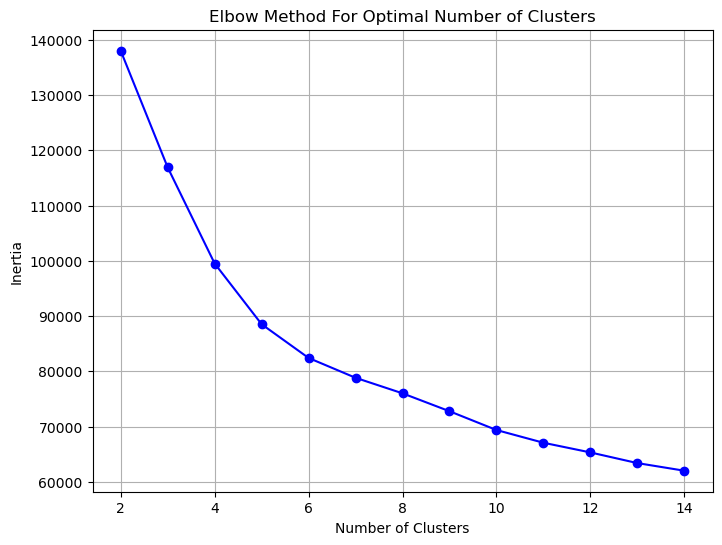

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set a range of clusters to try out
clusters_range = range(2, 15)

# List to hold the inertia for each number of clusters
inertias = []

# Perform K-means for each number of clusters and store the inertia
for num_clusters in clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_normalized)
    inertias.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(clusters_range, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.grid(True)
plt.show()


## Select and normalize

In [21]:
# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_normalized)

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Add the cluster assignments back to the original DataFrame
df['Cluster'] = cluster_assignments

df.head()


,fips,Age65Plus,AIAN,AIANmen,AIANwomen,ANHPI,ANHPImen,ANHPIwomen,Black,BlackMen,...,Poverty,Unemploy,UrbanRural,county,state,pcp,IsRural,CHD_Class,region,Cluster
0,34027,17.1,446,213,233,39922,19200,20722,13116,6312,...,4.7,5.0,LargeFringe_Urban,Morris,NJ,1.0,False,Low,Northeast,1
1,34025,17.7,781,508,273,26636,12508,14128,33615,15605,...,5.9,5.5,LargeFringe_Urban,Monmouth,NJ,0.8,False,Low,Northeast,1
2,34017,12.0,2619,1539,1080,88314,44162,44152,63097,29672,...,13.1,6.8,Large_Urban,Hudson,NJ,1.8,False,Low,Northeast,0
3,34041,18.1,135,75,60,2178,1107,1071,3878,1964,...,7.3,5.5,MediumSmall_Urban,Warren,NJ,1.6,False,Low,Northeast,1
4,34039,14.5,1425,865,560,23289,10781,12508,92839,42103,...,9.2,6.7,Large_Urban,Union,NJ,1.5,False,Low,Northeast,1


## Mean

In [22]:
# Calculate the mean values of our features within each cluster
cluster_characteristics = df.groupby('Cluster').mean()
cluster_characteristics.transpose()


Cluster,0,1,2,3
fips,2.623861e+04,30818.709951,6037.0,30180.962937
Age65Plus,1.451136e+01,18.532646,13.6,20.365788
AIAN,6.031023e+03,468.153519,61292.0,438.150392
AIANmen,2.982455e+03,231.899879,31146.0,213.125445
AIANwomen,3.048568e+03,236.253641,30146.0,225.024947
ANHPI,1.081277e+05,2482.338592,1263567.0,218.282965
ANHPImen,5.101868e+04,1159.301578,577195.0,97.368496
ANHPIwomen,5.710899e+04,1323.037015,686372.0,120.914469
Black,1.713742e+05,6184.191141,651221.0,3645.394155
BlackMen,7.813853e+04,2984.700850,302532.0,1752.470421


## Silhouette score

In [23]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(df_normalized, cluster_assignments)

sil_score


0.16659025768870228